In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
#half talbot length
def htal(d, lam):
    return d ** 2 / lam

In [18]:
#hc = 1.986e-25 Jm
#returns in keV lambda input is in nm
def energy(lam):
    return 1.2397 / lam

def wave(energy):
    return 1.2397 / energy

In [77]:
#de Broglie wavelength for Muonium 
def dBw(mass, velocity):
    return 6.626e-34 / (mass * velocity)

print(dBw(1.88353e-28, 2175), 'nm')

1.6174081546931533e-09 nm


In [20]:
print(energy(1.2), 'keV')
print(wave(4.51), 'nm')

1.0330833333333334 keV
0.2748780487804878 nm


In [32]:
xaxis = np.arange(50, 10001, 10)

xrays = []
light = []
muons = []

for xval in xaxis:
    xrays.append(htal(xval, 0.275)/10**3)
    light.append(htal(xval, 450)/10**3)
    muons.append(htal(xval, 1.62)/10**3)


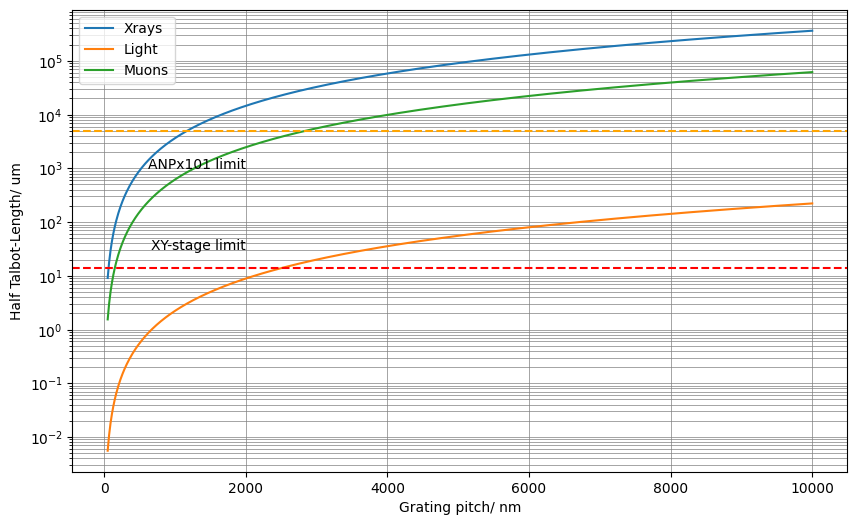

In [63]:
plt.figure(figsize=(10,6))
plt.plot(xaxis, xrays, label='Xrays')
plt.plot(xaxis, light, label='Light')
plt.plot(xaxis, muons, label='Muons')
plt.xlabel('Grating pitch/ nm')
plt.yscale('log')
plt.ylabel('Half Talbot-Length/ um')
plt.legend()
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray')

#JPE XY
plt.axhline(y=14, color='red', linestyle='--', label='XY stage limit')
plt.text(2000, 30, 'XY-stage limit', horizontalalignment='right')

#attocube
plt.axhline(y=5000, color='orange', linestyle='--', label='attocube limit')
plt.text(2000, 1000, 'ANPx101 limit', horizontalalignment='right')



plt.show()

#plt.axvline()



In [ ]:
#lets now try comparing TL and d



In [147]:
#compare TL and TCW
#give lam and d in nm (the conversion cancels out)
#d in mm
def tcw(lam, L, d, OF):
    return 38 * lam * L / (d * OF)

In [162]:
x = tcw(0.45, 80, 400, 1)
print(x)
print(1/x)

3.42
0.29239766081871343


In [215]:
#now a TL vs TCW plot
gratingPitch = np.arange(10, 10001, 10)

#in nm
#Xrays
#wavelength = 0.275
#Muonium
wavelength = 0.275
L = 20
OF = 0.5

talbotLength = []
coherenceWidth = []
minimum = []

#peak length
#choose tcw or TL
for pitch in gratingPitch:
    tl = htal(pitch, wavelength)/(1-OF)/10**3
    cw = tcw(wavelength, L, pitch, OF)*10**3
    talbotLength.append(tl)
    coherenceWidth.append(cw)
    minimum.append(1/(1/cw + 1/tl))
    
    #if tl < cw:
    #    minimum.append(tl)
    #else:
    #    minimum.append(cw)
    #talbot length outputs in nm (as we gave in nm)
    #tcw output in mm



In [216]:
#now for muonium
#now a TL vs TCW plot
gratingPitch = np.arange(10, 10001, 10)

#in nm
#Muonium
wavelength = 1.65
L = 20
OF = 0.5

MtalbotLength = []
McoherenceWidth = []
Mminimum = []

#peak length
#choose tcw or TL
for pitch in gratingPitch:
    tl = htal(pitch, wavelength)/(1-OF)/10**3
    cw = tcw(wavelength, L, pitch, OF)*10**3
    MtalbotLength.append(tl)
    McoherenceWidth.append(cw)
    Mminimum.append(1/(1/cw + 1/tl))
    
    #if tl < cw:
    #    minimum.append(tl)
    #else:
    #    minimum.append(cw)
    #talbot length outputs in nm (as we gave in nm)
    #tcw output in mm



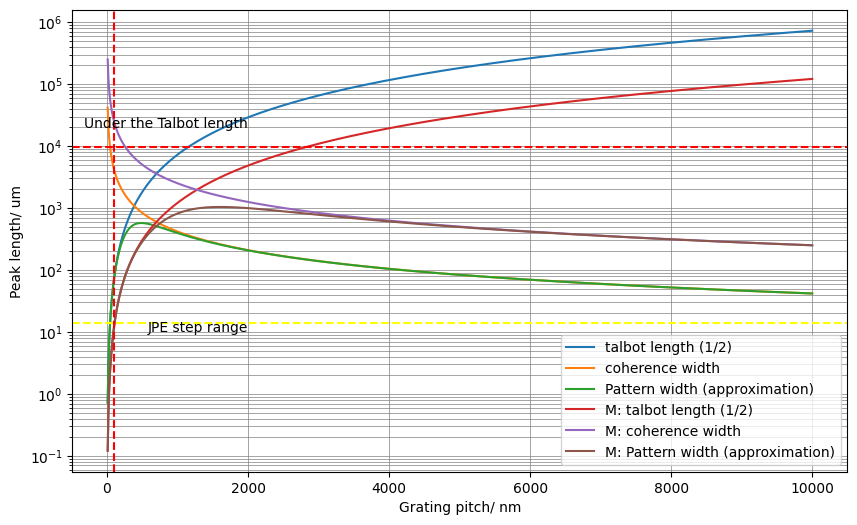

In [217]:
plt.figure(figsize=(10,6))
plt.plot(gratingPitch, talbotLength, label='talbot length (1/2)')
plt.plot(gratingPitch, coherenceWidth, label='coherence width')
plt.plot(gratingPitch, minimum, label='Pattern width (approximation)')
plt.plot(gratingPitch, MtalbotLength, label='M: talbot length (1/2)')
plt.plot(gratingPitch, McoherenceWidth, label='M: coherence width')
plt.plot(gratingPitch, Mminimum, label='M: Pattern width (approximation)')
plt.xlabel('Grating pitch/ nm')
plt.yscale('log')
plt.ylabel('Peak length/ um')
plt.legend()
plt.grid(True, which='both', linestyle='-', linewidth=0.5, color='gray')

#Near field conditions
plt.axhline(y=9750, color='red', linestyle='--', label='1 Talbot length')
plt.text(2000, 20000, 'Under the Talbot length', horizontalalignment='right')

#JPE stepping
plt.axhline(y=14, color='yellow', linestyle='--', label='JPE step range')
plt.text(2000, 10, 'JPE step range', horizontalalignment='right')

plt.axvline(x=100, color='red', linestyle='--', label='100nm') 

plt.show()

#plt.axvline()

In [189]:
#near field conditions
#talbot length < 9mm
#diffraction conditions
print(10000**2/0.27/10**6)

370.3703703703703
